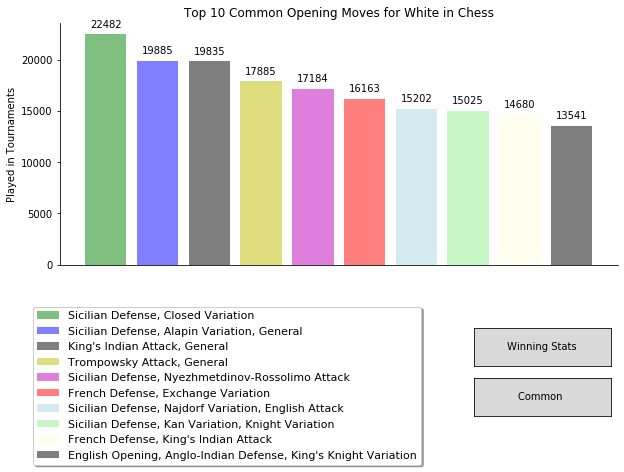

In [2]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.widgets import Button
import numpy as np


def wins(event) : 
    ax.clear()
    ax.set_title('Top 10 Common Opening Moves for White in Chess')
    width = 0.30
    y_position = -15
    ind = np.arange(0,10)
    bc1 = ax.bar(ind, player_win, width ,label='Player Wins', align='center')
    bc2 = ax.bar(ind + width , draw , width , label='Draw', align='center'  )
    bc3 = ax.bar(ind + (width*2), opponent_win , width , label='Opponent Wins', align='center')
    
    print(ax.patches)
    
    for i in range(0,10): 
        ax.text(0.2, y_position , "M{} - {}".format(i+1 , df_1["label"].iloc[i])  , size=10, ha='left' )
        y_position -= 5
          
    for p in ax.patches: 
        ax.annotate( int(round(p.get_height())),(p.get_x()+p.get_width()/2., p.get_height()), 
                    ha='center', fontsize=11 ,  va='center', xytext=(0, 10), textcoords='offset points')
    
    ax.set_ylim([0,100])
    ax.xaxis.set_visible(True)
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(('M1', 'M2', 'M3', 'M4', 'M5','M6', 'M7', 'M8', 'M9', 'M10'))
    ax.set_ylabel("Percentage %")
    ax.legend(fontsize = 11 , loc='upper center', fancybox=True, shadow=True)
    button()
    
def num_games(event):
    ax.clear()
    
    for index, row in df_1.iterrows():
        ax.bar([index], [row['value']], color=row['color'], label=row['label'],
           alpha=0.5, align='center')
        
    ax.set_title('Top 10 Common Opening Moves for White in Chess')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_ylabel("Played in Tournaments")
    winbut, gamebut = button()
    
    for p in ax.patches: 
        ax.annotate(int(p.get_height()), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
    
    ax.legend([
        "{}".format(df_1["label"].iloc[0]), 
        "{}".format(df_1["label"].iloc[1]),
        "{}".format(df_1["label"].iloc[2]),
        "{}".format(df_1["label"].iloc[3]),
        "{}".format(df_1["label"].iloc[4]), 
        "{}".format(df_1["label"].iloc[5]),
        "{}".format(df_1["label"].iloc[6]),
        "{}".format(df_1["label"].iloc[7]),
        "{}".format(df_1["label"].iloc[8]),
        "{}".format(df_1["label"].iloc[9])],
          fontsize = 11 , loc='upper center', bbox_to_anchor=(0.3, -0.15),
          fancybox=True, shadow=True)
    

def button ():
    axwin = plt.axes([0.7, 0.2, 0.19, 0.075])
    axgame = plt.axes([0.7, 0.1, 0.19, 0.075])
    winbut = Button(axwin , 'Winning Stats')
    gamebut = Button(axgame, 'Common ')
    winbut.on_clicked(wins)
    gamebut.on_clicked(num_games)
    return winbut, gamebut
    

 
        
# Getting the information     
df= pd.read_excel("First_moves.xls")

df_1 = pd.read_excel("opening_winning_stats.xls")

df_1 = df_1.drop_duplicates("Opening")
df = df.drop_duplicates("Opening")
common = df.merge(df_1, on=['Opening'] , how ="left" )
common = common.nlargest(10, 'Num Games')
common[["Player Win %",  "Draw %" , "Opponent Win %"]] *= 100

df_1 = pd.DataFrame({
        'value': common["Num Games"],
        'Player Win' : common["Player Win %"],
        'Draw' : common["Draw %"],
        'Opponent Win' : common["Opponent Win %"],
        'label': common["Opening"],
        'color':['g', 'b', 'k', 'y', 'm','r', 'lightblue', 'lightgreen', 'lightyellow', 'black']})




player_win = np.array(pd.Series(df_1['Player Win']))
draw = np.array(pd.Series(df_1['Draw']))
opponent_win = np.array(pd.Series(df_1['Opponent Win']))

    
# chart info 
fig, ax = plt.subplots(figsize=(10, 7))
fig.subplots_adjust(bottom = 0.4)



for index, row in df_1.iterrows():
    ax.bar([index], [row['value']], color=row['color'], label=row['label'],
           alpha=0.5, align='center')
    
plt.title("Top 10 Common Opening Moves for White in Chess")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_visible(False)
ax.set_ylabel("Played in Tournaments")
winbut, gamebut = button()
   
for p in ax.patches: 
    ax.annotate(int(p.get_height()), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

ax.legend([
        "{}".format(df_1["label"].iloc[0]), 
        "{}".format(df_1["label"].iloc[1]),
        "{}".format(df_1["label"].iloc[2]),
        "{}".format(df_1["label"].iloc[3]),
        "{}".format(df_1["label"].iloc[4]), 
        "{}".format(df_1["label"].iloc[5]),
        "{}".format(df_1["label"].iloc[6]),
        "{}".format(df_1["label"].iloc[7]),
        "{}".format(df_1["label"].iloc[8]),
        "{}".format(df_1["label"].iloc[9])],
          fontsize = 11 , loc='upper center', bbox_to_anchor=(0.3, -0.15),
          fancybox=True, shadow=True)

